# Freebayes variant exploration
In this notebook, we'll examine the variants generated using the freebayes variant caller.

In [2]:
from os import listdir
from pysam import VariantFile
from tqdm import tqdm
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gzip
import seaborn as sns

## Filtering freebayes outputs
To make sure that freebayes is behaving reasonably, we'll try two approaches to get to the final variants. First, we'll look at each sample's calls individually, and manually remove any variant that also appears in the control, then we'll look at the tumor/normal calls where the control is already accounted for. We have to apply hard filters to get the variants of interest in any case, because freebayes doesn't perform any filtering on the resulting variants. We'll use the package [`vcfflib`](https://github.com/vcflib/vcflib?tab=readme-ov-file#USAGE) on the command line, with the hard filters for haploids described in [this galaxy project tutorial](https://galaxyproject.org/tutorials/var-hap/). Here are the commands we run from my home directory.

### For single samples:
#### DIPLOID FILTERS ([source](https://www.scribd.com/document/415209482/Erik-Garrison-Iowa-Talk-2#page=15))

```
vcffilter \
    -f "QUAL > 1" \
    -f "QUAL / AO > 10" \
    -f "SAF > 0" \
    -f "SAR > 0" \
    -f "RPR > 1" \
    -f "RPL > 1" \
    /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/0M_R1/0M_R1.freebayes.vcf.gz \
    > /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/0M_R1/0M_R1.freebayes_DIP_FILTERED.vcf
```

```
vcffilter \
    -f "QUAL > 1" \
    -f "QUAL / AO > 10" \
    -f "SAF > 0" \
    -f "SAR > 0" \
    -f "RPR > 1" \
    -f "RPL > 1" \
    /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/0_1M_R2/0_1M_R2.freebayes.vcf.gz \
    > /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/0_1M_R2/0_1M_R2.freebayes_DIP_FILTERED.vcf
```
```
vcffilter \
    -f "QUAL > 1" \
    -f "QUAL / AO > 10" \
    -f "SAF > 0" \
    -f "SAR > 0" \
    -f "RPR > 1" \
    -f "RPL > 1" \
    /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/537_control_R2/537_control_R2.freebayes.vcf.gz \
    > /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/537_control_R2/537_control_R2.freebayes_DIP_FILTERED.vcf
```

#### HAPLOID FILTERS ([source](https://galaxyproject.org/tutorials/var-hap/))

```
vcffilter \
    -f "SRP > 20" \
    -f "SAP > 20" \
    -f "EPP > 20" \
    -f "QUAL > 30" \
    -f "DP > 100" \
    /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/0M_R1/0M_R1.freebayes.vcf.gz \
    > /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/0M_R1/0M_R1.freebayes_HAP_FILTERED.vcf
```

```
vcffilter \
    -f "SRP > 20" \
    -f "SAP > 20" \
    -f "EPP > 20" \
    -f "QUAL > 30" \
    -f "DP > 100" \
    /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/0_1M_R2/0_1M_R2.freebayes.vcf.gz \
    > /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/0_1M_R2/0_1M_R2.freebayes_HAP_FILTERED.vcf
```
```
vcffilter \
    -f "SRP > 20" \
    -f "SAP > 20" \
    -f "EPP > 20" \
    -f "QUAL > 30" \
    -f "DP > 100" \
    /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/537_control_R2/537_control_R2.freebayes.vcf.gz \
    > /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/537_control_R2/537_control_R2.freebayes_HAP_FILTERED.vcf
```


### For tumor/normal calls:
#### DIPLOID FILTERS
```
vcffilter \
    -f "QUAL > 1" \
    -f "QUAL / AO > 10" \
    -f "SAF > 0" \
    -f "SAR > 0" \
    -f "RPR > 1" \
    -f "RPL > 1" \
    /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/0M_R1_vs_537_control_R2/0M_R1_vs_537_control_R2.freebayes.vcf.gz \
    > /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/0M_R1_vs_537_control_R2/0M_R1_vs_537_control_R2.freebayes_DIP_FILTERED.vcf.gz
```

```
vcffilter \
    -f "QUAL > 1" \
    -f "QUAL / AO > 10" \
    -f "SAF > 0" \
    -f "SAR > 0" \
    -f "RPR > 1" \
    -f "RPL > 1" \
    /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/0_1M_R2_vs_537_control_R2/0_1M_R2_vs_537_control_R2.freebayes.vcf.gz \
    > /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/0_1M_R2_vs_537_control_R2/0_1M_R2_vs_537_control_R2.freebayes_DIP_FILTERED.vcf.gz
```

#### HAPLOID FILTERS
```
vcffilter \
    -f "SRP > 20" \
    -f "SAP > 20" \
    -f "EPP > 20" \
    -f "QUAL > 30" \
    -f "DP > 100" \
    /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/0M_R1_vs_537_control_R2/0M_R1_vs_537_control_R2.freebayes.vcf.gz \
    > /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/0M_R1_vs_537_control_R2/0M_R1_vs_537_control_R2.freebayes_HAP_FILTERED.vcf.gz
```

```
vcffilter \
    -f "SRP > 20" \
    -f "SAP > 20" \
    -f "EPP > 20" \
    -f "QUAL > 30" \
    -f "DP > 100" \
    /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/0_1M_R2_vs_537_control_R2/0_1M_R2_vs_537_control_R2.freebayes.vcf.gz \
    > /mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/0_1M_R2_vs_537_control_R2/0_1M_R2_vs_537_control_R2.freebayes_HAP_FILTERED.vcf.gz
```

## Examining filtered outputs
Now, let's look at the basic statistics of the filtered variants, as well as the transition rates to see if we can detect the EMS bias with these filters.

First, let's look at the rates of the different transitions (which I'll calculate here as just the fraction of times the transition occurred of the variants that passed the screening -- I think this is different than the calculations done in the Arabidopsis paper linked below). Does this match with published expectations of the rates of these transitions?

We'll pair together transitions that are complements of one another, as was done in [Ossowski et al, 2014, Table 2](https://pmc.ncbi.nlm.nih.gov/articles/PMC3878865/table/T2/):
```
A:T→G:C
C:G→T:A
A:T→T:A
C:G→A:T
A:T→C:G
C:G→G:C
```

Note that freebayes, in contrast to strelka, combines SNVs and indels in a single vcf file. We'll ignore the indels for the moment.

### Tumor/normal paired
We still need to filter out calls in common with the control for the non-tumor/normal paired samples, so we'll first just look at the tumor/normal paired samples:

In [3]:
conversion_pairs = {
    'A:T→G:C': ['A > G', 'T > C'],
    'C:G→T:A': ['C > T', 'G > A'],
    'A:T→T:A': ['A > T', 'T > A'],
    'C:G→A:T': ['C > A', 'G > T'],
    'A:T→C:G': ['A > C', 'T > G'],
    'C:G→G:C': ['C > G', 'G > C']
}

For sample 0M_R1_vs_537_control_R2, 36 of 44 variants are SNVs, while 8 are indels.
For sample 0_1M_R2_vs_537_control_R2, 38 of 48 variants are SNVs, while 10 are indels.


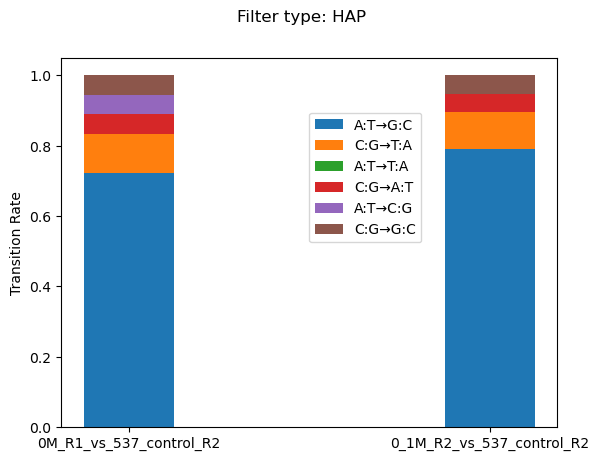

For sample 0M_R1_vs_537_control_R2, 71 of 2293 variants are SNVs, while 2222 are indels.
For sample 0_1M_R2_vs_537_control_R2, 81 of 2329 variants are SNVs, while 2248 are indels.


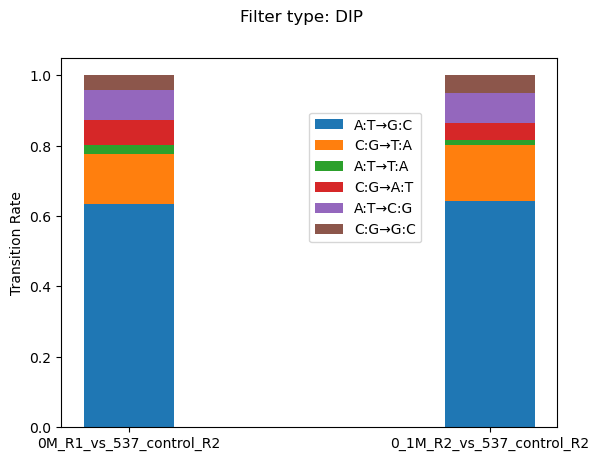

In [4]:
vcf_top_path = '/mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/'
for filter_type in ['HAP', 'DIP']:
    all_conversions = {}
    all_snp_totals = {}
    for sample in listdir(vcf_top_path):
        # Get the SNP basic info
        if '_vs_' not in sample:
            continue
        variants = VariantFile(f'{vcf_top_path}/{sample}/{sample}.freebayes_{filter_type}_FILTERED.vcf.gz').fetch()
        conversions = defaultdict(int)
        num_snvs = 0
        num_indels = 0
        for variant in variants:
            if len(variant.alts[0]) == 1:
                # print(variant.chrom, variant.pos, variant.ref, ">", variant.alts[0], variant.qual, variant.filter.values()[0].name)
                conversions[f'{variant.ref} > {variant.alts[0]}'] += 1
                num_snvs += 1
            else:
                # print(variant.alts)
                num_indels += 1
        print(f'For sample {sample}, {num_snvs} of {num_snvs + num_indels} variants are SNVs, while {num_indels} are indels.')
        all_snp_totals[sample] = num_snvs
        all_conversions[sample] = conversions
    
    # Get the conversion probabilities
    conversion_probs = defaultdict(dict)
    for sample, conversions in all_conversions.items():
        for name, pair in conversion_pairs.items():
            pair_total = conversions[pair[0]] + conversions[pair[1]]
            conversion_probs[sample][name] = pair_total/all_snp_totals[sample]
    # Need to wrangle for stacked bars
    conversions_to_plot = {pair: np.array([v[pair] for v in conversion_probs.values()]) for pair in conversion_pairs.keys()}

    # Make the plot
    fig, ax = plt.subplots()

    width = 0.25
    bottom = np.zeros(2)
    
    for name, probs in conversions_to_plot.items():
        ax.bar(conversion_probs.keys(), probs, width, bottom=bottom, label=f'{name}')
        bottom += probs
    
    ax.set_ylabel('Transition Rate')
    # ax.set_xticks(ticks=ax.get_xticks(), labels=conversion_probs.keys(), rotation=90)
    ax.legend(loc=(0.5,0.5))
    fig.suptitle(f'Filter type: {filter_type}')
    
    plt.show()

### Individual samples
Now, we need to remove the control SNPs from the treatment samples.

In [10]:
def loadVCF(vcf):
    """
    Use pandas to load a vcf as a dataframe.
    """
    # Detect true header row
    try:
        with gzip.open(vcf, 'rb') as f:
            for i, l in enumerate(f.readlines()):
                if l.decode()[0] != '#':
                    header_row = i - 1 # Want the last row starting with #
                    break
    except gzip.BadGzipFile:
         with open(vcf, 'rb') as f:
            for i, l in enumerate(f.readlines()):
                if l.decode()[0] != '#':
                    header_row = i - 1 # Want the last row starting with #
                    break
                    
    # Load vcf
    df = pd.read_csv(vcf, sep='\t', header=header_row)

    return df

8 of 21 variants (38.10%) are unique to sample 0_1M_R2
For sample 0_1M_R2, 8 of 8 variants are SNVs, while 0 are indels.
8 of 23 variants (34.78%) are unique to sample 0M_R1
For sample 0M_R1, 8 of 8 variants are SNVs, while 0 are indels.


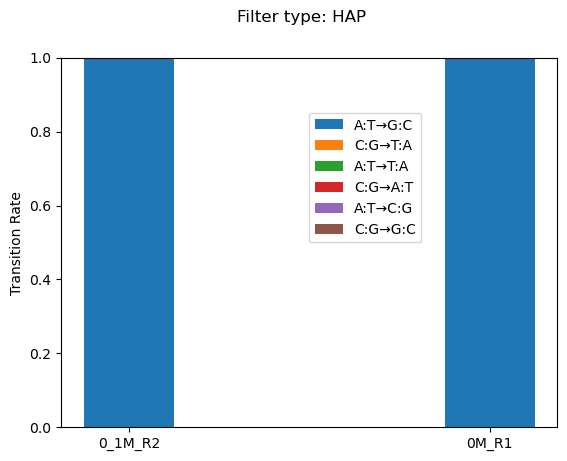

586 of 1834 variants (31.95%) are unique to sample 0_1M_R2
For sample 0_1M_R2, 22 of 586 variants are SNVs, while 564 are indels.
585 of 1794 variants (32.61%) are unique to sample 0M_R1
For sample 0M_R1, 16 of 585 variants are SNVs, while 569 are indels.


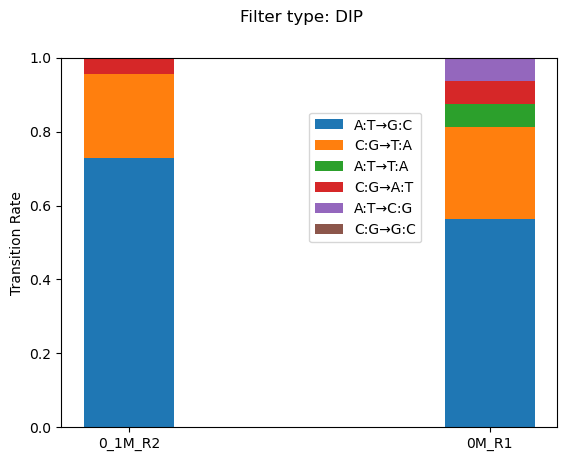

In [15]:
vcf_top_path = '/mnt/research/Walker_Lab_Research/Serena_project_data/evolved-nanno_data/data/nanno_sarek/freebayes_output/variant_calling/freebayes/'
for filter_type in ['HAP', 'DIP']:
    all_conversions = {}
    all_snp_totals = {}
    control_variants = loadVCF(f'{vcf_top_path}/537_control_R2/537_control_R2.freebayes_{filter_type}_FILTERED.vcf')
    control_variants['variant_identifier'] = list(zip(control_variants['#CHROM'], control_variants['POS']))
    for sample in listdir(vcf_top_path):
        # Get the SNP basic info
        if '_vs_' in sample or 'control' in sample:
            continue
        variants = loadVCF(f'{vcf_top_path}/{sample}/{sample}.freebayes_{filter_type}_FILTERED.vcf')
        variants['variant_identifier'] = list(zip(variants['#CHROM'], variants['POS']))
        # Remove the control variants
        filtered_df = variants[~variants['variant_identifier'].isin(control_variants.variant_identifier)]
        print(f'{len(filtered_df)} of {len(variants)} variants ({100*(len(filtered_df)/len(variants)):.2f}%) are unique to sample {sample}')
        # Then get the info we need for the plot
        conversions = defaultdict(int)
        num_snvs = 0
        num_indels = 0
        for i, variant in filtered_df.iterrows():
            if len(variant.ALT) == 1:
                # print(variant.chrom, variant.pos, variant.ref, ">", variant.alts[0], variant.qual, variant.filter.values()[0].name)
                conversions[f'{variant.REF} > {variant.ALT}'] += 1
                num_snvs += 1
            else:
                # print(variant.alts)
                num_indels += 1
        print(f'For sample {sample}, {num_snvs} of {num_snvs + num_indels} variants are SNVs, while {num_indels} are indels.')
        all_snp_totals[sample] = num_snvs
        all_conversions[sample] = conversions
    
    # Get the conversion probabilities
    conversion_probs = defaultdict(dict)
    for sample, conversions in all_conversions.items():
        for name, pair in conversion_pairs.items():
            pair_total = conversions[pair[0]] + conversions[pair[1]]
            conversion_probs[sample][name] = pair_total/all_snp_totals[sample]
    # Need to wrangle for stacked bars
    conversions_to_plot = {pair: np.array([v[pair] for v in conversion_probs.values()]) for pair in conversion_pairs.keys()}

    # Make the plot
    fig, ax = plt.subplots()

    width = 0.25
    bottom = np.zeros(2)
    
    for name, probs in conversions_to_plot.items():
        ax.bar(conversion_probs.keys(), probs, width, bottom=bottom, label=f'{name}')
        bottom += probs
    
    ax.set_ylabel('Transition Rate')
    # ax.set_xticks(ticks=ax.get_xticks(), labels=conversion_probs.keys(), rotation=90)
    ax.legend(loc=(0.5,0.5))
    fig.suptitle(f'Filter type: {filter_type}')
    
    plt.show()